# Project "Diabetes"

## Data

The current code uses the [Diabetes](https://archive.ics.uci.edu/ml/datasets/Diabetes) data set provided by the UIC Machine Learning Repository as input.

This data set contains the data in separate files, each file comprising data collected during outpatient management of a diabetic person. The data columns correspond to measurement date, time, category and value.
Our code merges the individual file into a unique data file and adds a column containing the patient index for each data row. We also clean the data from missing values as well as some data points with unrecognized format.

## Methods

We generate filter the data according to patient index and measurement category. The filtered data are displayed in histogram or scatter plots. These plots are meant to illustrate the data and discover correlations within the data.

We split the patient sample into two sub-samples. The first one is determined from the patient sample at random while the second one is complementary to the first one with respect to the patient sample. The measured pre-breakfast blood sugar values are pooled over the sub-samples in order to generate two distributions which we may compare statistically.

We determine the statistics for these distributions and represent them as histograms and scatter plots.

We test these sub-samples for normality and use non-parametric tests to compare them as they are not drawn from normal distributions.

Various tables including the statistics of the distributions as well as p-values resulting from the performed tests are generated.

In [1]:
#cell for tests of individual commands or command sequences

In [2]:
# import the python module pandas with the abbreviation pd
# import the python module numpy with the abbreviation np
# import the python module matplotlib with the abbreviation plt
# import the python module plotly.graph_objects with the abbreviation go
# import the python module plotly.io with the abbreviation pio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [3]:
# Read the data from the files data-1 to data-70
file_name = list(range(70))      #generate a list for saving the data file names from where the data are imported
DiabetesData = pd.DataFrame()    #generate a structure to save the data
for i in range(70):              #read the individual data files
    file_name[i] = 'Diabetes_Database\data-' + str(i+1)
    DiabetesData_temp = pd.read_csv(file_name[i],sep='\t',dtype='str',header=None,names=['Date','Time','Code','Value']) #get data from the first file
    dimensions = DiabetesData_temp.shape    #returns the dimensions of the data table
    row_number = dimensions[0]              #returns the number of rows in the data table
    patient_index = pd.Series((np.full((row_number), i+1)))    #create a Series object containing the patient number
    DiabetesData_temp.insert(0, 'Patient', patient_index, allow_duplicates=False)    #add a column consisting of elements
                                                                                     #with the patent number value
    DiabetesData = DiabetesData.append(DiabetesData_temp,ignore_index=True)    #merge the individual data into a total data set
DiabetesData    #output the total data set
#DiabetesData.astype({'Code': 'int32'})      #it should convert the column 'Code' to int32, but it does not work!?
#DiabetesData.astype({'Value': 'int32'})     #it should convert the column 'Value' to int32, but it does not work!?    
writer = pd.ExcelWriter('Diabetes_Database\TotalData.xlsx')
DiabetesData.to_excel(writer)
writer.save()   # save the total data set to an Excel file

In [4]:
#Clean data
DiabetesData_NaN_removed = DiabetesData.dropna()     #remove rows which contain missing values, i.e. 67 rows out of 23329 for this data set
                                                     #corresponding to approximately 0.23% of the entries.
DiabetesData_NaN_removed.replace('0Hi','0',inplace=True)    #set these strange values to zero.
DiabetesData_NaN_removed.replace('0Lo','0',inplace=True)
#DiabetesData_NaN_removed.replace('0"','0',inplace=True)    #'0"' could not be found, I had to set it to zero manually.
DiabetesData_NaN_removed['Code'] = pd.to_numeric(DiabetesData_NaN_removed['Code'])
DiabetesData_NaN_removed['Value'] = pd.to_numeric(DiabetesData_NaN_removed['Value'])
writer = pd.ExcelWriter('Diabetes_Database\DiabetesData_NaN_removed.xlsx')
DiabetesData_NaN_removed.to_excel(writer)
writer.save()   # save the total data set to an Excel file
print(DiabetesData_NaN_removed.dtypes)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Patient      int64
Date        object
Time        object
Code         int64
Value      float64
dtype: object


In [5]:
#Generate a table to illustrate the data in the report
DiabetesData_NaN_removed_rows_1_to_5 = DiabetesData_NaN_removed.head()
fig = go.Figure(data=go.Table(
    header=dict(values=DiabetesData_NaN_removed.columns,
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[DiabetesData_NaN_removed_rows_1_to_5.Patient,
               DiabetesData_NaN_removed_rows_1_to_5.Date,
               DiabetesData_NaN_removed_rows_1_to_5.Time,
               DiabetesData_NaN_removed_rows_1_to_5.Code,
               DiabetesData_NaN_removed_rows_1_to_5.Value],
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=600, height=600)
fig.write_image("Dataset_rows_1_to_5.png")

In [5]:
#Select pre-breakfast blood glucose values corresponding to pre-defined patients.
DiabetesData_NaN_removed_PrB = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == 58]    #select all pre-breakfast rows
DiabetesData_NaN_removed_PrB_1 = DiabetesData_NaN_removed_PrB[DiabetesData_NaN_removed_PrB['Patient'] == 1]   #select pre-breakfast rows of patient number 1
DiabetesData_NaN_removed_PrB_20 = DiabetesData_NaN_removed_PrB[DiabetesData_NaN_removed_PrB['Patient'] == 20]   #select pre-breakfast rows of patient number 20
DiabetesData_NaN_removed_PrB_60 = DiabetesData_NaN_removed_PrB[DiabetesData_NaN_removed_PrB['Patient'] == 60]   #select pre-breakfast rows of patient number 60
DiabetesData_NaN_removed_PrB_1_BG = DiabetesData_NaN_removed_PrB_1['Value']     #select pre-breakfast blood glucose values of patient number 1
DiabetesData_NaN_removed_PrB_20_BG = DiabetesData_NaN_removed_PrB_20['Value']   #select pre-breakfast blood glucose values of patient number 20
DiabetesData_NaN_removed_PrB_60_BG = DiabetesData_NaN_removed_PrB_60['Value']     #select pre-breakfast blood glucose values of patient number 60

In [6]:
#Alternative syntax for selecting blood glucose values corresponding to pre-defined patients and events, i.e. codes. The problem is that the histograms are plotted separately afterwards
#DiabetesData_Patient_NaN_removed_1_Code_BG_Values = DiabetesData_NaN_removed.loc[DiabetesData_NaN_removed.Patient == 1, ['Patient', 'Code', 'Value']]
#DiabetesData_Patient_NaN_removed_1_PBBG_Values = DiabetesData_Patient_NaN_removed_1_Code_BG_Values.loc[DiabetesData_Patient_NaN_removed_1_Code_BG_Values.Code == 58, ['Value']]
#DiabetesData_Patient_NaN_removed_10_Code_BG_Values = DiabetesData_NaN_removed.loc[DiabetesData_NaN_removed.Patient == 10, ['Patient', 'Code', 'BG Value']]
#DiabetesData_Patient_NaN_removed_10_PBBG_Values = DiabetesData_Patient_NaN_removed_10_Code_BG_Values.loc[DiabetesData_Patient_NaN_removed_10_Code_BG_Values.Code == 58, ['Value']

In [6]:
#Calculate statistc measures of the selected pre-breakfast blood glucose values
print(DiabetesData_NaN_removed_PrB_1_BG.describe())
print(DiabetesData_NaN_removed_PrB_20_BG.describe())
print(DiabetesData_NaN_removed_PrB_60_BG.describe())

count    135.000000
mean     169.718519
std       70.601642
min       55.000000
25%      109.000000
50%      163.000000
75%      237.500000
max      335.000000
Name: Value, dtype: float64
count    135.000000
mean     184.296296
std      100.564680
min       30.000000
25%       98.500000
50%      172.000000
75%      250.000000
max      450.000000
Name: Value, dtype: float64
count     27.000000
mean     173.851852
std       64.228381
min       69.000000
25%      131.000000
50%      178.000000
75%      210.000000
max      309.000000
Name: Value, dtype: float64


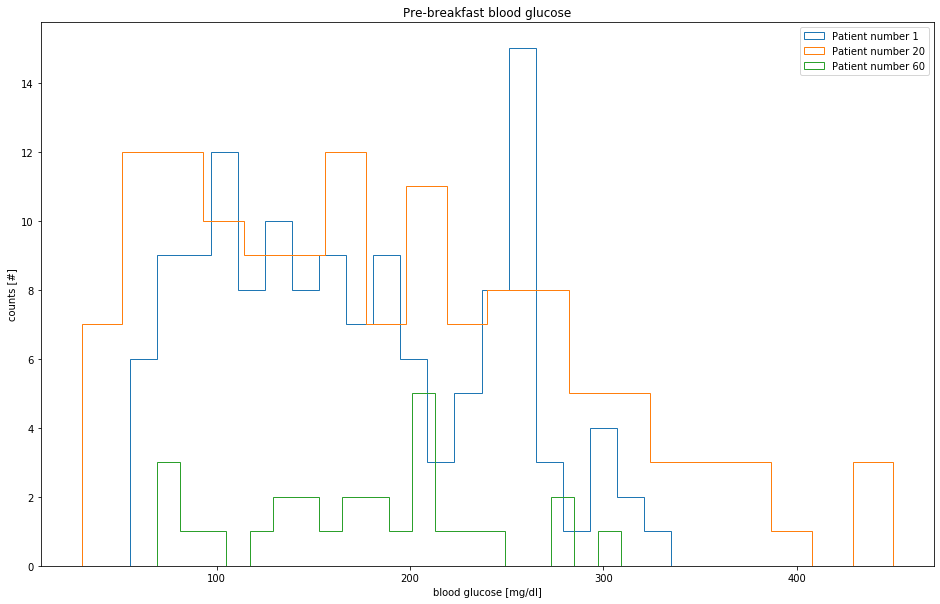

In [7]:
#Plot a histogram of the selected pre-breakfast blood glucose values
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre-breakfast blood glucose')
axes = DiabetesData_NaN_removed_PrB_1_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 1")
DiabetesData_NaN_removed_PrB_20_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 20")
DiabetesData_NaN_removed_PrB_60_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 60")
axes.set_xlabel('blood glucose [mg/dl]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("PrBBG_pat_1_20_60_histogram.png")
plt.show()

In [9]:
#Data inspection shows no post-breakfast blood glucose measurements corresponding to patients 1, 20, 40 and 60.

In [11]:
#Data of patients 1, 20, 40 and 60 do not include any post-breakfast measurements.

In [8]:
#Select pre-lunch blood glucose values corresponding to pre-defined patients.
#Data inspection shows that the data for patient 40 do not contain any pre-lunch measurements
DiabetesData_NaN_removed_PrL = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == 60]    #select all pre-lunch rows
DiabetesData_NaN_removed_PrL_1 = DiabetesData_NaN_removed_PrL[DiabetesData_NaN_removed_PrL['Patient'] == 1]   #select pre-lunch rows of patient number 1
DiabetesData_NaN_removed_PrL_20 = DiabetesData_NaN_removed_PrL[DiabetesData_NaN_removed_PrL['Patient'] == 20]   #select pre-lunch rows of patient number 20
DiabetesData_NaN_removed_PrL_60 = DiabetesData_NaN_removed_PrL[DiabetesData_NaN_removed_PrL['Patient'] == 60]   #select pre-lunch rows of patient number 60
DiabetesData_NaN_removed_PrL_1_BG = DiabetesData_NaN_removed_PrL_1['Value']     #select pre-lunch blood glucose values of patient number 1
DiabetesData_NaN_removed_PrL_20_BG = DiabetesData_NaN_removed_PrL_20['Value']   #select pre-lunch blood glucose values of patient number 20
DiabetesData_NaN_removed_PrL_60_BG = DiabetesData_NaN_removed_PrL_60['Value']     #select pre-lunch blood glucose values of patient number 60

In [9]:
#Calculate and print statistic measures of the selected pre-lunch blood glucose values
print(DiabetesData_NaN_removed_PrL_1_BG.describe())
print(DiabetesData_NaN_removed_PrL_20_BG.describe())
print(DiabetesData_NaN_removed_PrL_60_BG.describe())

count     54.000000
mean     141.074074
std       63.613174
min       54.000000
25%       80.250000
50%      133.500000
75%      187.000000
max      306.000000
Name: Value, dtype: float64
count    132.000000
mean     161.537879
std       89.124273
min       28.000000
25%       92.000000
50%      144.000000
75%      227.500000
max      450.000000
Name: Value, dtype: float64
count     26.000000
mean     105.538462
std       79.922077
min       29.000000
25%       59.750000
50%       93.000000
75%      105.750000
max      376.000000
Name: Value, dtype: float64


In [14]:
#Data of patient number 40 contain no pre-lunch measurements.

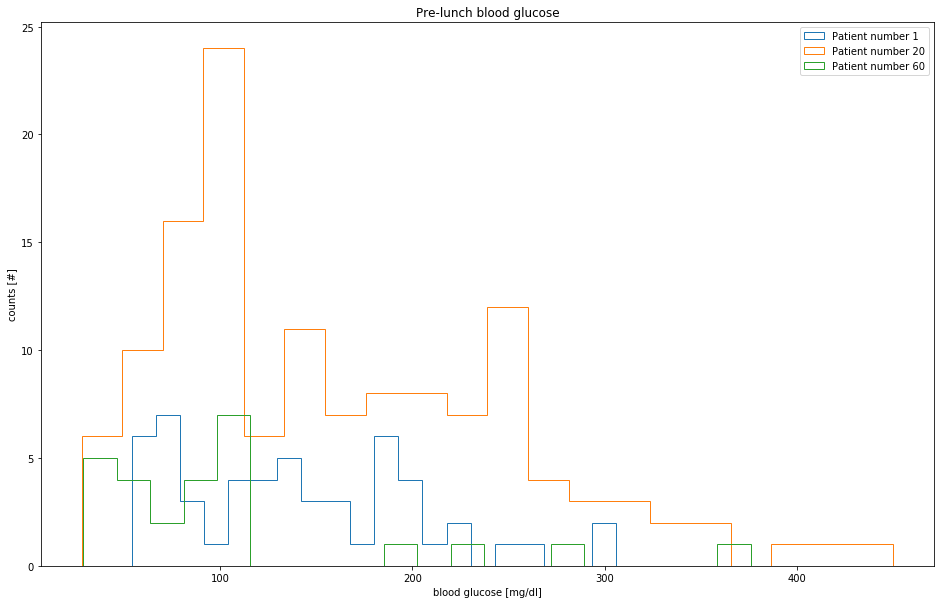

In [10]:
#Plot a histogram of the selected pre-lunch blood glucose values
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre-lunch blood glucose')
axes = DiabetesData_NaN_removed_PrL_1_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 1")
DiabetesData_NaN_removed_PrL_20_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 20")
DiabetesData_NaN_removed_PrL_60_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 60")
axes.set_xlabel('blood glucose [mg/dl]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("PrLBG_pat_1_20_60_histogram.png")
plt.show()

In [11]:
#Select post-lunch blood glucose values corresponding to pre-defined patients.
#Data inspection shows that the data for patients 1, 20 and 40 do not contain post-lunch measurements.
#Therefore, we select only values for patient number 60.
DiabetesData_NaN_removed_PoL = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == 61]    #select all pre-supper rows
DiabetesData_NaN_removed_PoL_60 = DiabetesData_NaN_removed_PoL[DiabetesData_NaN_removed_PoL['Patient'] == 60]   #select pre-supper rows of patient number 60
DiabetesData_NaN_removed_PoL_60_BG = DiabetesData_NaN_removed_PoL_60['Value']     #select pre-supper blood glucose values of patient number 60
print(DiabetesData_NaN_removed_PoL_60_BG)

24649    231.0
24761    111.0
24827    163.0
Name: Value, dtype: float64


In [12]:
#Calculate and print statistic measures of the selected post-lunch blood glucose values
print(DiabetesData_NaN_removed_PoL_60_BG.describe())

count      3.000000
mean     168.333333
std       60.177515
min      111.000000
25%      137.000000
50%      163.000000
75%      197.000000
max      231.000000
Name: Value, dtype: float64


In [ ]:
#There are two little post-lunch measurements per patient in order to obtain good statistics.

In [14]:
#Select pre-supper blood glucose values corresponding to pre-defined patients.
#Data inspection shows that the data for patient number 40 do not contain any pre-supper measurements
DiabetesData_NaN_removed_PrS = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == 62]    #select all pre-supper rows
DiabetesData_NaN_removed_PrS_1 = DiabetesData_NaN_removed_PrS[DiabetesData_NaN_removed_PrS['Patient'] == 1]   #select pre-supper rows of patient number 1
DiabetesData_NaN_removed_PrS_20 = DiabetesData_NaN_removed_PrS[DiabetesData_NaN_removed_PrS['Patient'] == 20]   #select pre-supper rows of patient number 20
DiabetesData_NaN_removed_PrS_60 = DiabetesData_NaN_removed_PrS[DiabetesData_NaN_removed_PrS['Patient'] == 60]   #select pre-supper rows of patient number 60
DiabetesData_NaN_removed_PrS_1_BG = DiabetesData_NaN_removed_PrS_1['Value']     #select pre-supper blood glucose values of patient number 1
DiabetesData_NaN_removed_PrS_20_BG = DiabetesData_NaN_removed_PrS_20['Value']   #select pre-supper blood glucose values of patient number 20
DiabetesData_NaN_removed_PrS_60_BG = DiabetesData_NaN_removed_PrS_60['Value']     #select pre-supper blood glucose values of patient number 60

In [15]:
#Calculate and print statistic measures of the selected pre-supper blood glucose values
print(DiabetesData_NaN_removed_PrS_1_BG.describe())
print(DiabetesData_NaN_removed_PrS_20_BG.describe())
print(DiabetesData_NaN_removed_PrS_60_BG.describe())

count    102.000000
mean     161.235294
std       66.365054
min       43.000000
25%      108.000000
50%      156.500000
75%      207.000000
max      343.000000
Name: Value, dtype: float64
count    135.000000
mean     184.659259
std       86.385129
min       35.000000
25%      125.000000
50%      181.000000
75%      244.500000
max      450.000000
Name: Value, dtype: float64
count     23.000000
mean     108.304348
std       59.075787
min       30.000000
25%       48.000000
50%      113.000000
75%      163.000000
max      217.000000
Name: Value, dtype: float64


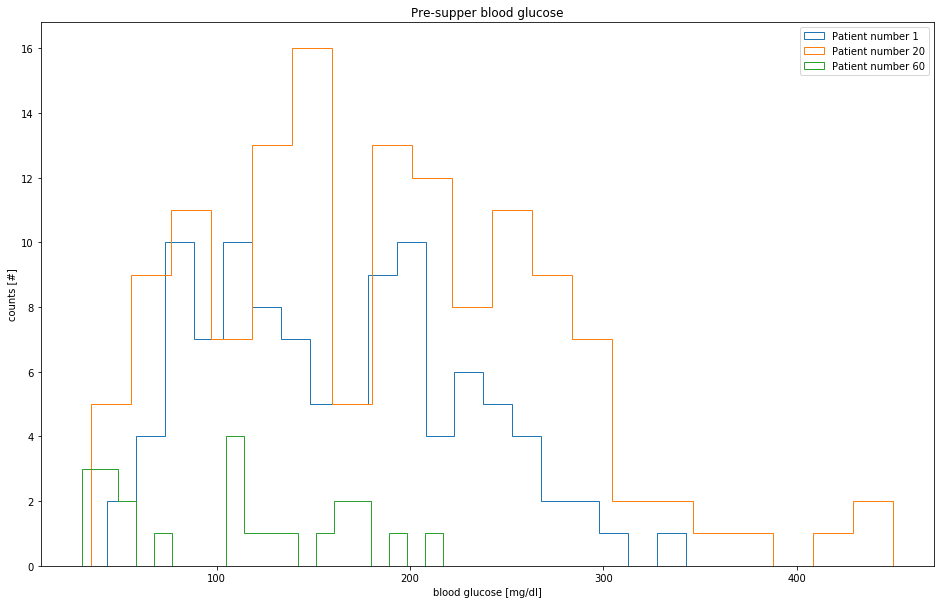

In [16]:
#Plot a histogram of the selected pre-supper blood glucose values
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre-supper blood glucose')
axes = DiabetesData_NaN_removed_PrS_1_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 1")
DiabetesData_NaN_removed_PrS_20_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 20")
DiabetesData_NaN_removed_PrS_60_BG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 60")
axes.set_xlabel('blood glucose [mg/dl]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("PrSBG_pat_1_20_60_histogram.png")
plt.show()

In [37]:
#Select regular insulin doses corresponding to patients 1, 20 and 60.
DiabetesData_NaN_removed_Regular_Patient_1 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 33) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 1)]['Value']   #select doses for patient number 1
DiabetesData_NaN_removed_Regular_Patient_20 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 33) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 20)]['Value']   #select doses for patient number 20
DiabetesData_NaN_removed_Regular_Patient_60 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 33) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 60)]['Value']   #select doses for patient number 60
print(DiabetesData_NaN_removed_Regular_Patient_1.describe())
print(DiabetesData_NaN_removed_Regular_Patient_20.describe())
print(DiabetesData_NaN_removed_Regular_Patient_60.describe())

count    384.00000
mean       6.59375
std        2.34639
min        1.00000
25%        4.00000
50%        7.00000
75%        8.00000
max       11.00000
Name: Value, dtype: float64
count    413.000000
mean       7.142857
std        3.126993
min        1.000000
25%        5.000000
50%        7.000000
75%       10.000000
max       14.000000
Name: Value, dtype: float64
count    88.000000
mean      5.113636
std       2.570531
min       2.000000
25%       3.000000
50%       5.000000
75%       6.000000
max      13.000000
Name: Value, dtype: float64


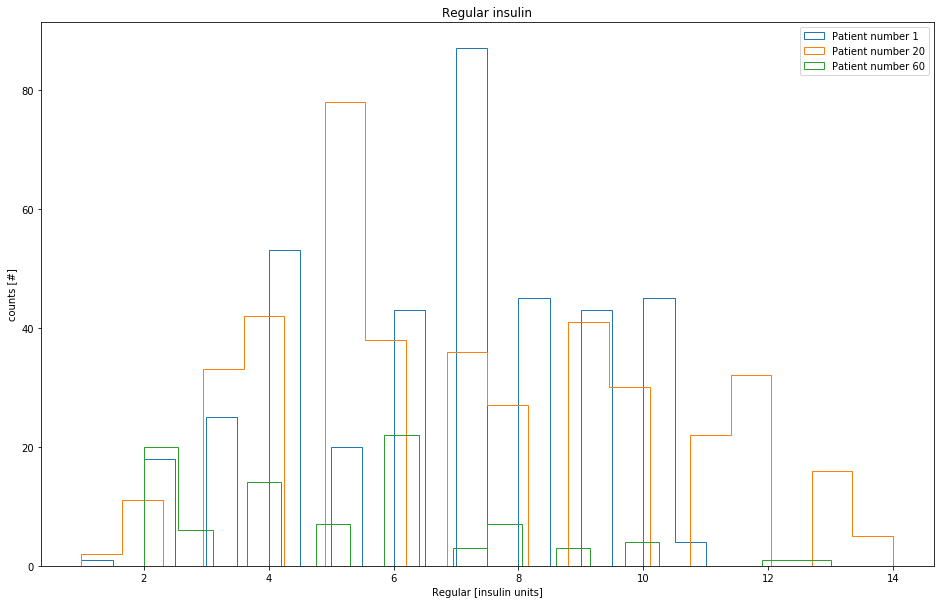

In [39]:
#Plot a histogram of the selected NPH insulin doses
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Regular insulin')
axes = DiabetesData_NaN_removed_Regular_Patient_1.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 1")
DiabetesData_NaN_removed_Regular_Patient_20.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 20")
DiabetesData_NaN_removed_Regular_Patient_60.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 60")
axes.set_xlabel('Regular [insulin units]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("Regular_pat_1_20_60_histogram.png")
plt.show()

In [31]:
#Select NPH insulin doses corresponding to patients 4, 10 and 40.
DiabetesData_NaN_removed_NPH_Patient_4 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 34) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 4)]['Value']   #select doses for patient number 4
DiabetesData_NaN_removed_NPH_Patient_10 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 34) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 10)]['Value']   #select doses for patient number 10
DiabetesData_NaN_removed_NPH_Patient_40 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 34) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 40)]['Value']   #select doses for patient number 40
print(DiabetesData_NaN_removed_NPH_Patient_4.describe())
print(DiabetesData_NaN_removed_NPH_Patient_10.describe())
print(DiabetesData_NaN_removed_NPH_Patient_40.describe())

count    58.000000
mean      8.413793
std       0.530954
min       8.000000
25%       8.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: Value, dtype: float64
count    67.000000
mean      5.126866
std       2.032582
min       2.000000
25%       3.000000
50%       5.000000
75%       7.000000
max       8.000000
Name: Value, dtype: float64
count     8.000000
mean      8.750000
std       2.251983
min       6.000000
25%       6.750000
50%       9.000000
75%      10.250000
max      12.000000
Name: Value, dtype: float64


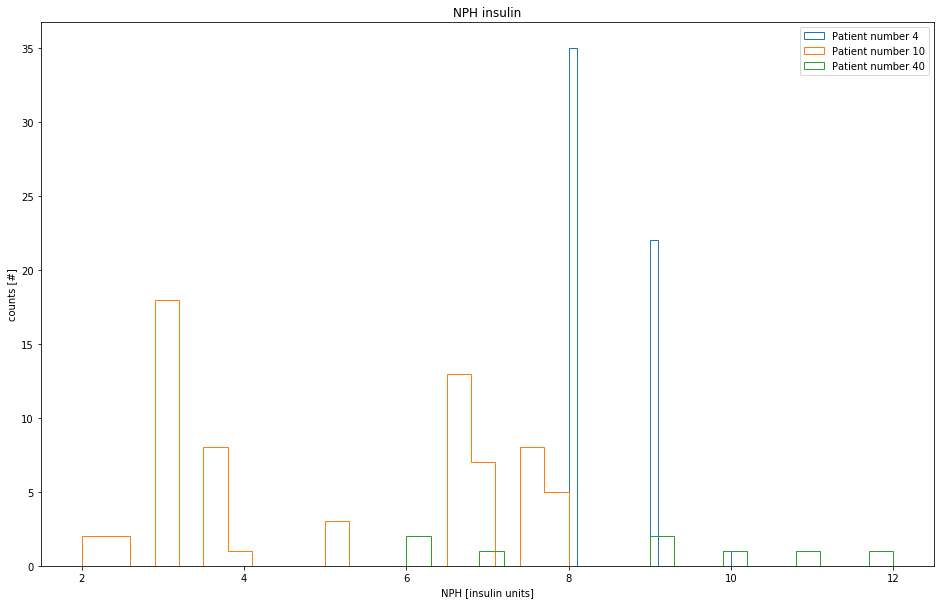

In [32]:
#Plot a histogram of the selected NPH insulin doses
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('NPH insulin')
axes = DiabetesData_NaN_removed_NPH_Patient_4.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 4")
DiabetesData_NaN_removed_NPH_Patient_10.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 10")
DiabetesData_NaN_removed_NPH_Patient_40.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 40")
axes.set_xlabel('NPH [insulin units]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("NPH_pat_4_10_40_histogram.png")
plt.show()

In [34]:
#Select UltraLente insulin doses corresponding to patients 3, 22 and 60.
DiabetesData_NaN_removed_Ultra_Patient_3 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 35) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 3)]['Value']   #select doses for patient number 3
DiabetesData_NaN_removed_Ultra_Patient_22 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 35) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 22)]['Value']   #select doses for patient number 22
DiabetesData_NaN_removed_Ultra_Patient_60 = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == 35) & \
                                                        (DiabetesData_NaN_removed['Patient'] == 60)]['Value']   #select doses for patient number 60
print(DiabetesData_NaN_removed_Ultra_Patient_3.describe())
print(DiabetesData_NaN_removed_Ultra_Patient_22.describe())
print(DiabetesData_NaN_removed_Ultra_Patient_60.describe())

count    73.000000
mean      8.452055
std       0.501140
min       8.000000
25%       8.000000
50%       8.000000
75%       9.000000
max       9.000000
Name: Value, dtype: float64
count    101.000000
mean      14.930693
std        2.623957
min       12.000000
25%       13.000000
50%       13.000000
75%       18.000000
max       18.000000
Name: Value, dtype: float64
count    76.000000
mean      7.052632
std       2.957002
min       3.000000
25%       3.000000
50%       7.000000
75%      10.000000
max      10.000000
Name: Value, dtype: float64


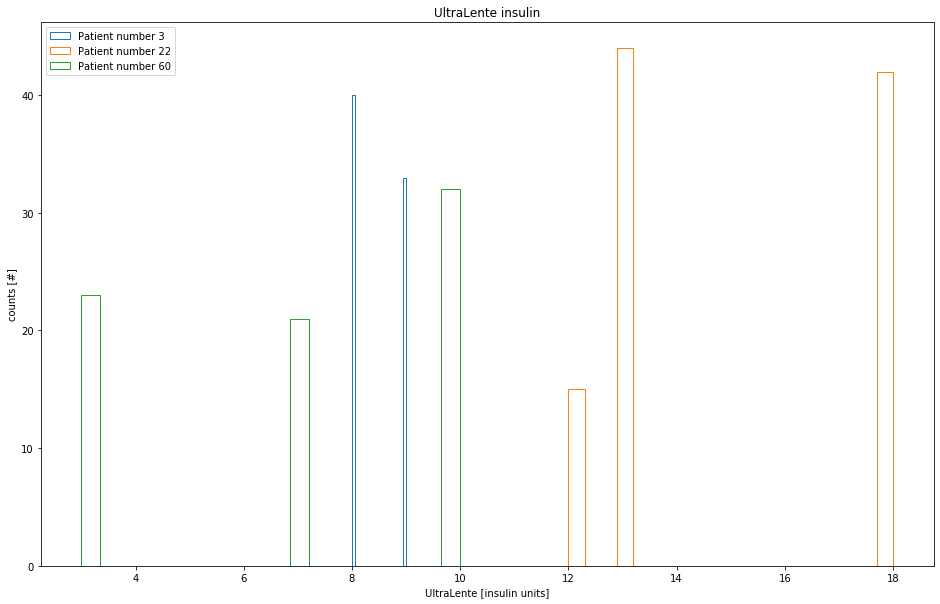

In [35]:
#Plot a histogram of the selected UltraLente insulin doses
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('UltraLente insulin')
axes = DiabetesData_NaN_removed_Ultra_Patient_3.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 3")
DiabetesData_NaN_removed_Ultra_Patient_22.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 22")
DiabetesData_NaN_removed_Ultra_Patient_60.plot(kind="hist",bins=20,fill=False,histtype='step',label="Patient number 60")
axes.set_xlabel('UltraLente [insulin units]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("UltraLente_pat_3_22_20_histogram.png")
plt.show()

In [26]:
#Extract the insulin doses corresponding to Codes 34 and 35, i.e. NPH and UltraLente insulin.
insulin_codes = [34,35]
DiabetesData_NaN_removed_NPH = DiabetesData_NaN_removed[(DiabetesData_NaN_removed['Code'] == insulin_codes[0]) & \
                                                        (DiabetesData_NaN_removed['Value'] < 60)]['Value']
DiabetesData_NaN_removed_Ultra = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == insulin_codes[1]]['Value']
min_dim = min(len(DiabetesData_NaN_removed_NPH),len(DiabetesData_NaN_removed_Ultra))

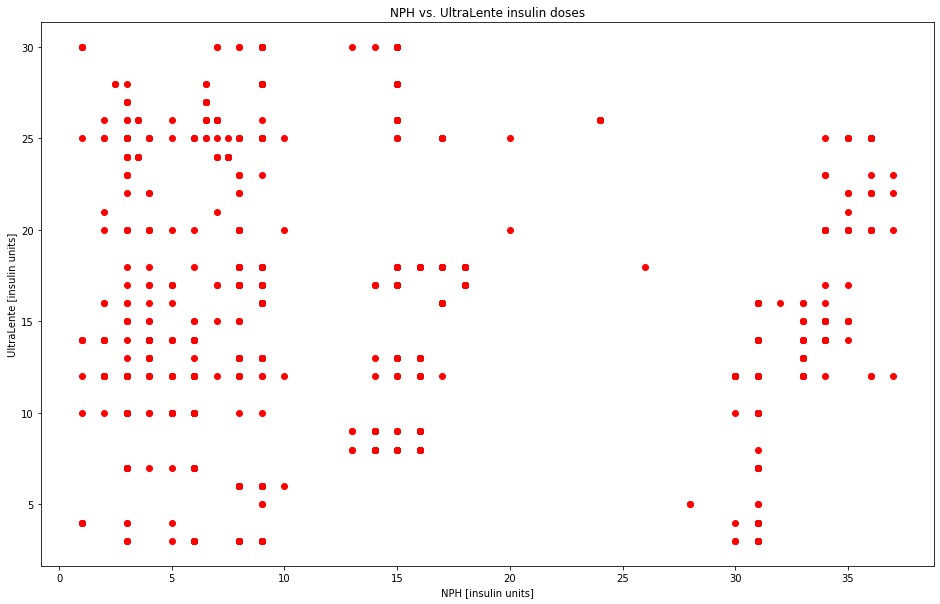

In [27]:
#Plot a scatter plot of the NPH versus UltraLente insulin doses.
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('NPH vs. UltraLente insulin doses')
axes = plt.scatter(DiabetesData_NaN_removed_NPH[0:min_dim],DiabetesData_NaN_removed_Ultra[0:min_dim],c='r')
plt.xlabel('NPH [insulin units]')
plt.ylabel('UltraLente [insulin units]')
plt.savefig("NPH_vs_UltraLente.png")
plt.show()

In [12]:
#Extract the pre- and post breakfast blood glucose values corresponding to Codes 58 and 59.
BG_codes = [58,59]
DiabetesData_NaN_removed_PrBBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[0]]['Value']
DiabetesData_NaN_removed_PoBBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[1]]['Value']
min_dim = min(len(DiabetesData_NaN_removed_PrBBG),len(DiabetesData_NaN_removed_PoBBG))

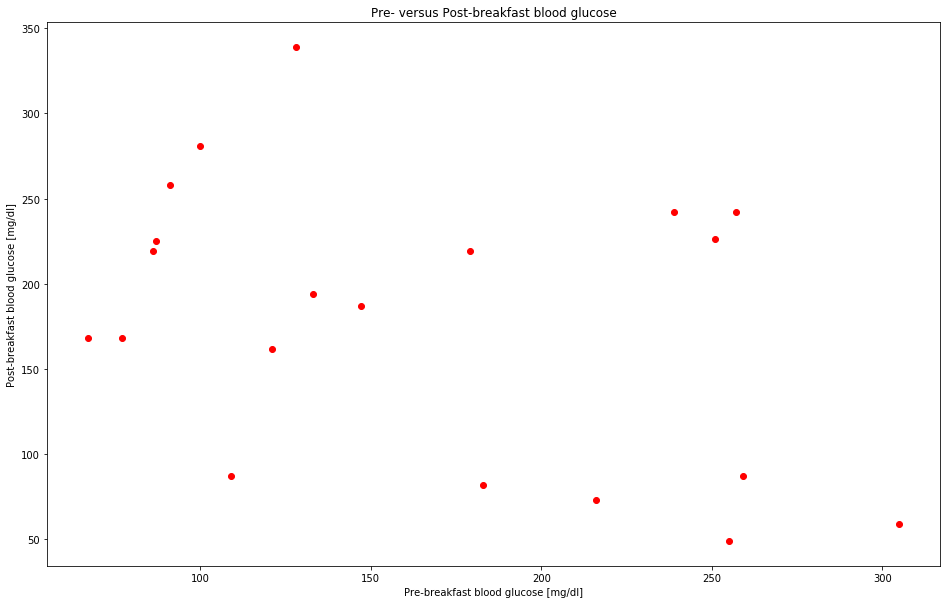

In [13]:
#Plot a scatter plot of pre- versus post breakfast blood glucose values.
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre- versus Post-breakfast blood glucose')
axes = plt.scatter(DiabetesData_NaN_removed_PrBBG[0:min_dim],DiabetesData_NaN_removed_PoBBG[0:min_dim],c='r')
plt.xlabel('Pre-breakfast blood glucose [mg/dl]')
plt.ylabel('Post-breakfast blood glucose [mg/dl]')
plt.savefig("Pr_vs_PoBBG.png")
plt.show()

In [14]:
#Extract the pre- and post lunch blood glucose values corresponding to Codes 60 and 61.
BG_codes = [60,61]
DiabetesData_NaN_removed_PrLBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[0]]['Value']
DiabetesData_NaN_removed_PoLBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[1]]['Value']
min_dim = min(len(DiabetesData_NaN_removed_PrLBG),len(DiabetesData_NaN_removed_PoLBG))

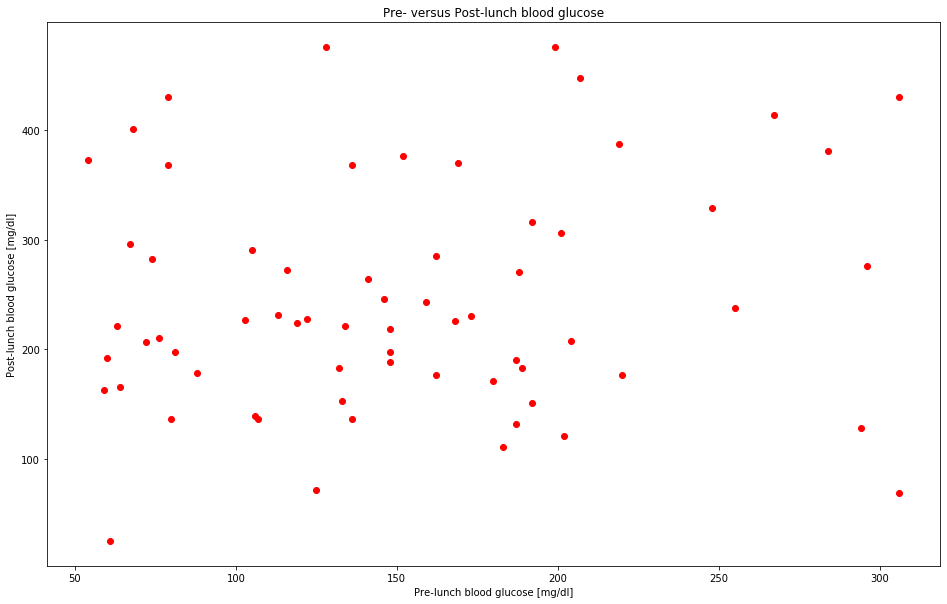

In [15]:
#Plot a scatter plot of pre- versus post lunch blood glucose values.
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre- versus Post-lunch blood glucose')
axes = plt.scatter(DiabetesData_NaN_removed_PrLBG[0:min_dim],DiabetesData_NaN_removed_PoLBG[0:min_dim],c='r')
plt.xlabel('Pre-lunch blood glucose [mg/dl]')
plt.ylabel('Post-lunch blood glucose [mg/dl]')
plt.savefig("Pr_vs_PoLBG.png")
plt.show()

In [16]:
#Extract the pre- and post lunch blood glucose values corresponding to Codes 60 and 61.
BG_codes = [62,63]
DiabetesData_NaN_removed_PrSBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[0]]['Value']
DiabetesData_NaN_removed_PoSBG = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Code'] == BG_codes[1]]['Value']
min_dim = min(len(DiabetesData_NaN_removed_PrSBG),len(DiabetesData_NaN_removed_PoSBG))

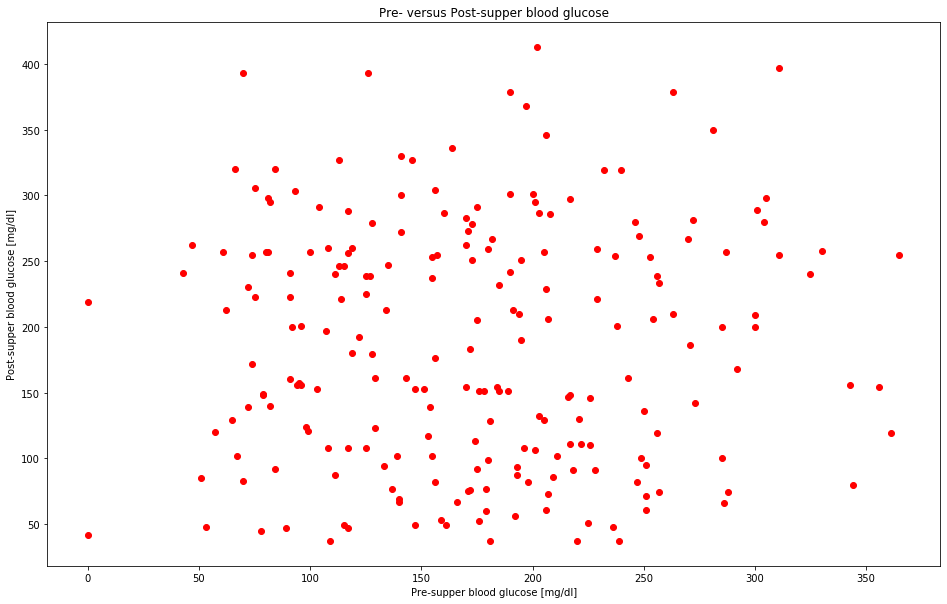

In [17]:
#Plot a scatter plot of pre- versus post lunch blood glucose values.
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre- versus Post-supper blood glucose')
axes = plt.scatter(DiabetesData_NaN_removed_PrSBG[0:min_dim],DiabetesData_NaN_removed_PoSBG[0:min_dim],c='r')
plt.xlabel('Pre-supper blood glucose [mg/dl]')
plt.ylabel('Post-supper blood glucose [mg/dl]')
plt.savefig("Pr_vs_PoSBG.png")
plt.show()

In [6]:
#Generate two samples from the population of 70 patients.
index_patient = np.linspace(1,70,70,endpoint=True,dtype='int')      #generate an array comprising all patient indices
print(index_patient)
index_set_1 = np.random.randint(1, 70 + 1,size=35)      #generate a first random sample
index_set_2 = []                                        #generate a void array to store the indices of
                                                        #the complementary sample of the first sample
                                                        #with respect to the patient sample
print(index_set_1)
for index in index_patient:                             #generate the complementary set to the first set
    if index not in index_set_1:                           
        index_set_2 = np.append(index_set_2,index)
        index_set_2 = index_set_2.astype(int)
print(index_set_2)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[63 18 61  1 33  7  6 31 25 32 38  1 31 21 62 25 58 55 56 19 41 59 31 31
 64 12  1 67 25 36 51 44 53 38 26]
[ 2  3  4  5  8  9 10 11 13 14 15 16 17 20 22 23 24 27 28 29 30 34 35 37
 39 40 42 43 45 46 47 48 49 50 52 54 57 60 65 66 68 69 70]


In [6]:
#re-use the same sets temporarily in order to calculate correlation coefficients corresponding to the samples in the report
#index_set_1 = [63, 18, 61,  1, 33,  7,  6, 31, 25, 32, 38,  1, 31, 21, 62, 25, 58, 55, 56, 19, 41, 59, 31, 31,
# 64, 12,  1, 67, 25, 36, 51, 44, 53, 38, 26]
#index_set_2 = [ 2,  3,  4,  5,  8,  9, 10, 11, 13, 14, 15, 16, 17, 20, 22, 23, 24, 27, 28, 29, 30, 34, 35, 37,
# 39, 40, 42, 43, 45, 46, 47, 48, 49, 50, 52, 54, 57, 60, 65, 66, 68, 69, 70]

In [7]:
#generate the data frames corresponding to each patient sample
DiabetesData_NaN_removed_set_1 = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Patient'].isin(index_set_1)]
DiabetesData_NaN_removed_set_2 = DiabetesData_NaN_removed[DiabetesData_NaN_removed['Patient'].isin(index_set_2)]

In [8]:
#pool pre-brakfast blood glucose values for all patients per set
DiabetesData_NaN_removed_set_1_PrBBG = DiabetesData_NaN_removed_set_1[DiabetesData_NaN_removed_set_1['Code'] == 58]['Value']
DiabetesData_NaN_removed_set_2_PrBBG = DiabetesData_NaN_removed_set_2[DiabetesData_NaN_removed_set_2['Code'] == 58]['Value']

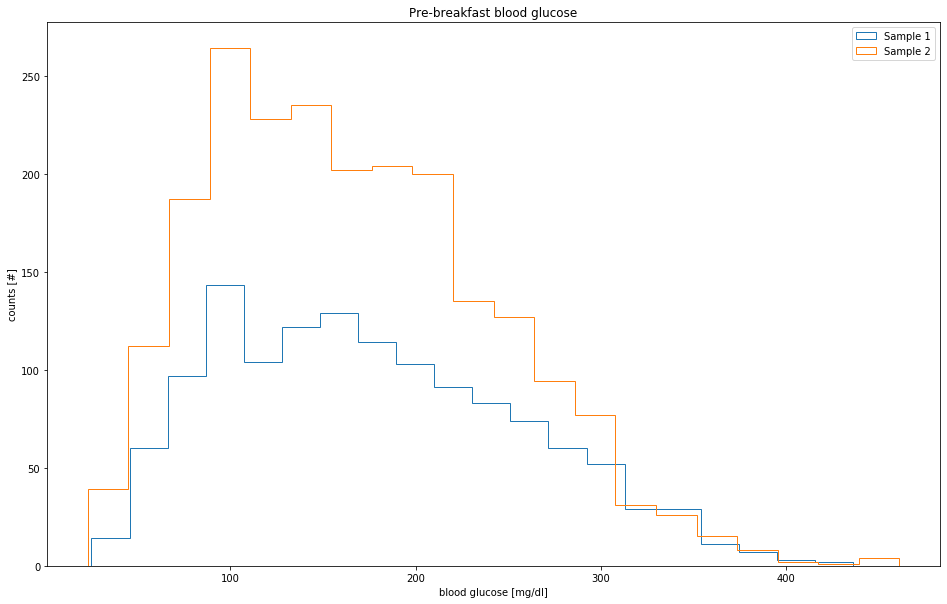

In [9]:
#plot histograms of the blood glucose values per sample
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Pre-breakfast blood glucose')
axes = DiabetesData_NaN_removed_set_1_PrBBG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Sample 1")
DiabetesData_NaN_removed_set_2_PrBBG.plot(kind="hist",bins=20,fill=False,histtype='step',label="Sample 2")
axes.set_xlabel('blood glucose [mg/dl]')
axes.set_ylabel('counts [#]')
plt.legend()
plt.savefig("PrBBG_samples_1_and_2.png")
plt.show()

In [10]:
#calculate statistics of the blood glucose samples corresponding to both generated patient samples
DiabetesData_NaN_removed_set_1_PrBBG_statistics = DiabetesData_NaN_removed_set_1_PrBBG.describe()
DiabetesData_NaN_removed_set_2_PrBBG_statistics = DiabetesData_NaN_removed_set_2_PrBBG.describe()
#initialize arrays for saving the statistics
count = []
mean = []
standard = []
minimum = []
quantile_25 = []
median = []
quantile_75 = []
maximum = []
count = np.append(count,DiabetesData_NaN_removed_set_1_PrBBG_statistics['count'])
count = np.append(count,DiabetesData_NaN_removed_set_2_PrBBG_statistics['count'])
mean = np.append(mean,DiabetesData_NaN_removed_set_1_PrBBG_statistics['mean'])
mean = np.append(mean,DiabetesData_NaN_removed_set_2_PrBBG_statistics['mean'])
minimum = np.append(minimum,DiabetesData_NaN_removed_set_1_PrBBG_statistics['min'])
minimum = np.append(minimum,DiabetesData_NaN_removed_set_2_PrBBG_statistics['min'])
standard = np.append(standard,DiabetesData_NaN_removed_set_1_PrBBG_statistics['std'])
standard = np.append(standard,DiabetesData_NaN_removed_set_2_PrBBG_statistics['std'])
quantile_25 = np.append(quantile_25,DiabetesData_NaN_removed_set_1_PrBBG_statistics['25%'])
quantile_25 = np.append(quantile_25,DiabetesData_NaN_removed_set_2_PrBBG_statistics['25%'])
median = np.append(median,DiabetesData_NaN_removed_set_1_PrBBG_statistics['50%'])
median = np.append(median,DiabetesData_NaN_removed_set_2_PrBBG_statistics['50%'])
quantile_75 = np.append(quantile_75,DiabetesData_NaN_removed_set_1_PrBBG_statistics['75%'])
quantile_75 = np.append(quantile_75,DiabetesData_NaN_removed_set_2_PrBBG_statistics['75%'])
maximum = np.append(maximum,DiabetesData_NaN_removed_set_1_PrBBG_statistics['max'])
maximum = np.append(maximum,DiabetesData_NaN_removed_set_2_PrBBG_statistics['max'])
print(DiabetesData_NaN_removed_set_1_PrBBG.describe())
print(DiabetesData_NaN_removed_set_2_PrBBG.describe())
print(count,mean,standard,minimum,quantile_25,median,quantile_75,maximum)

count    1327.000000
mean      177.279578
std        80.558764
min        25.000000
25%       110.000000
50%       168.000000
75%       235.500000
max       436.000000
Name: Value, dtype: float64
count    2191.000000
mean      166.707896
std        75.718015
min        23.000000
25%       106.000000
50%       157.000000
75%       216.500000
max       461.000000
Name: Value, dtype: float64
[1327. 2191.] [177.279578   166.70789594] [80.55876356 75.71801524] [25. 23.] [110. 106.] [168. 157.] [235.5 216.5] [436. 461.]


In [11]:
#Generate a table using plotly displaying the blood glucose sample statistics per patient sample
fig = go.Figure(data=go.Table(
    header=dict(values=['sample [#]', 'no. data pts. [#]', 'mean[mg/dl]', 'std[mg/dl]', 'min[mg/dl]', '25%[mg/dl]', \
                        '50%[mg/dl]', '75%[mg/dl]', 'max[mg/dl]'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['1','2'], # 1st column
                       ['{:4.0f}'.format(count[0]), '{:4.0f}'.format(count[1])], # 2nd column
                       ['{:5.3f}'.format(mean[0]), '{:5.3f}'.format(mean[1])], # 3rd column
                       ['{:5.3f}'.format(standard[0]), '{:5.3f}'.format(standard[1])], # 4th column
                       ['{:4.0f}'.format(minimum[0]), '{:4.0f}'.format(minimum[1])], # 5th column
                       ['{:4.0f}'.format(quantile_25[0]), '{:4.0f}'.format(quantile_25[1])], # 6th column
                       ['{:4.0f}'.format(median[0]), '{:4.0f}'.format(median[1])], # 7th column
                       ['{:4.0f}'.format(quantile_75[0]), '{:4.0f}'.format(quantile_75[1])], # 8th column
                       ['{:4.0f}'.format(maximum[0]), '{:4.0f}'.format(maximum[1])]], # 9th column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=1000, height=300)
fig.write_image("Patient sample statistics.png")

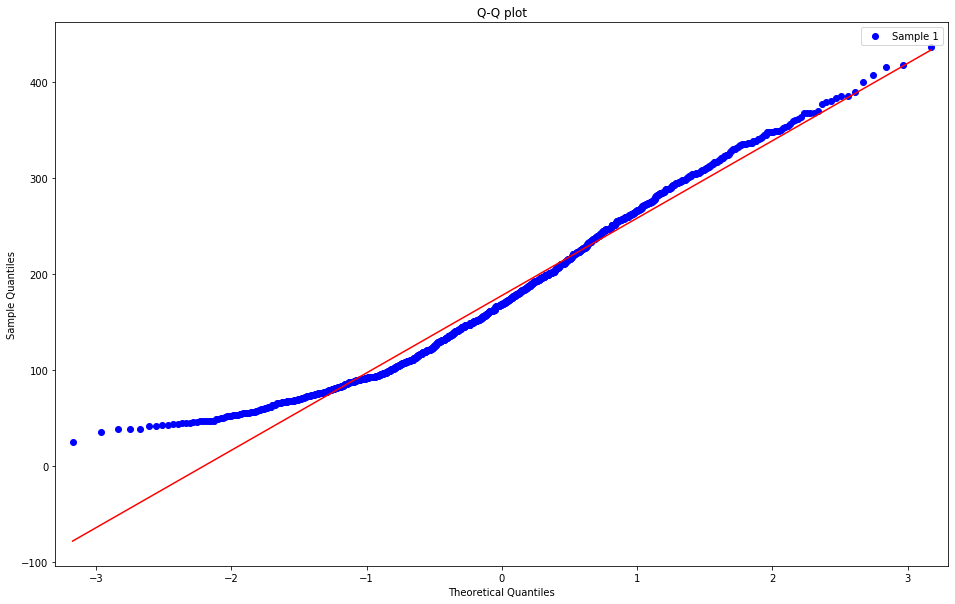

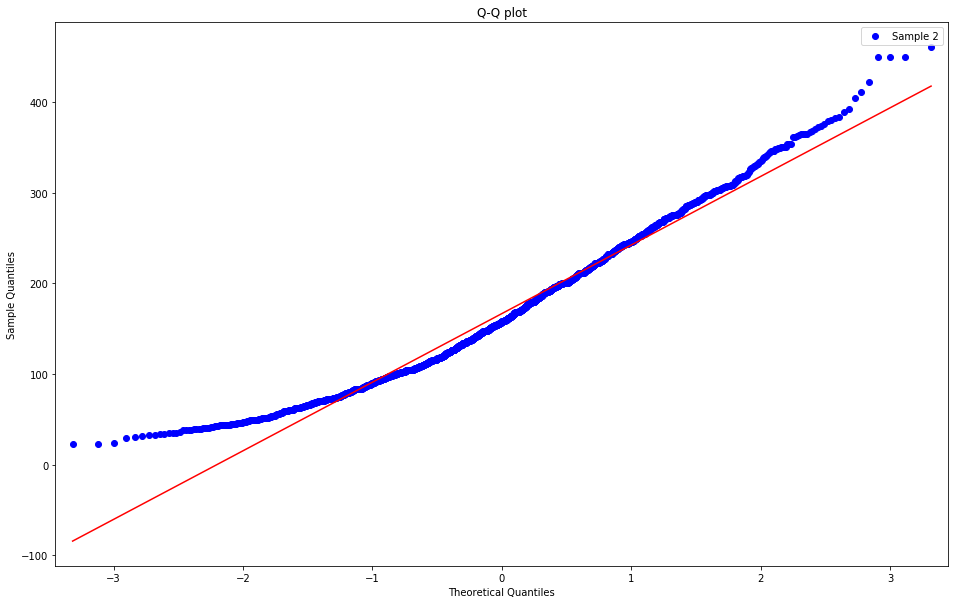

In [12]:
#Test the blood glucose distributions for normality using Q-Q-plots and generate figures showing the Q-Q-plots.
figure_qq_set_1_PrBBG = plt.figure(figsize=(16,10))     #generate the figure object for the Q-Q-plot of the first sample
axes = figure_qq_set_1_PrBBG.subplots()
plt.title('Q-Q plot')
qqplot(DiabetesData_NaN_removed_set_1_PrBBG, line='s', label = "Sample 1", ax = axes)
plt.legend()
plt.savefig("Q-Q-plot_sample_1.png")
figure_qq_set_2_PrBBG = plt.figure(figsize=(16,10))     #generate the figure object for the Q-Q-plot of the second sample
axes = figure_qq_set_2_PrBBG.subplots()
plt.title('Q-Q plot')
qqplot(DiabetesData_NaN_removed_set_2_PrBBG, line='s', label = "Sample 2", ax = axes)
plt.legend()
plt.savefig("Q-Q-plot_sample_2.png")
plt.show()

In [13]:
#Test the blood glucose distributions for normality
#Perform the D’Agostino and Pearson’s test for normality.
S_AP_set_1_PrBBG,p_AP_set_1_PrBBG = stats.normaltest(DiabetesData_NaN_removed_set_1_PrBBG)
S_AP_set_2_PrBBG,p_AP_set_2_PrBBG = stats.normaltest(DiabetesData_NaN_removed_set_2_PrBBG)
#Perform the Shapiro-Wilk test for normality. 
S_SW_set_1_PrBBG,p_SW_set_1_PrBBG = stats.shapiro(DiabetesData_NaN_removed_set_1_PrBBG)
S_SW_set_2_PrBBG,p_SW_set_2_PrBBG = stats.shapiro(DiabetesData_NaN_removed_set_2_PrBBG)

In [14]:
#Generate a table using plotly displaying the p-values of the normality tests
fig = go.Figure(data=go.Table(
    header=dict(values=['sample [#]', 'p-value (AP)', 'p-value (SW)'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['1','2'], # 1st column
                       ['{:5.3e}'.format(p_AP_set_1_PrBBG), '{:5.3e}'.format(p_AP_set_2_PrBBG)], # 2nd column
                       ['{:5.3e}'.format(p_SW_set_1_PrBBG), '{:5.3e}'.format(p_SW_set_2_PrBBG)]], # 3rd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=1000, height=300)
fig.write_image("Normality test p-values.png")

In [23]:
#The p-values from the normality tests reject the H0 hypothesis, i.e. the samples do not originate from normal distributions.
#As the samples are neither normally distributed nor paired (the blood glucose values come from different patients)
#we perform non-parametric tests, namely Mann-Whitney and Kolgomorov-Smirnov, to assess if they come from the same population.
S_MW_PrBBG, p_MW_PrBBG = stats.mannwhitneyu(DiabetesData_NaN_removed_set_1_PrBBG, DiabetesData_NaN_removed_set_2_PrBBG, use_continuity=True, alternative=None)       #Mann-Whitney
S_KS_PrBBG, p_KS_PrBBG = stats.ks_2samp(DiabetesData_NaN_removed_set_1_PrBBG, DiabetesData_NaN_removed_set_2_PrBBG)   #Kolgomorov-Smirnov

In [24]:
#Generate a table using plotly displaying the p-values of non-parametric tests
fig = go.Figure(data=go.Table(
    header=dict(values=['Test', 'p-Value',],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['Mann-Whitney','Kolgomorov-Smirnov'], # 1st column
                       ['{:5.3e}'.format(p_MW_PrBBG), '{:5.3e}'.format(p_KS_PrBBG)]], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=500, height=300)
fig.write_image("Non-parametric test p-values.png")

In [11]:
#we need the minimal length of these vectors for the scatter plot
min_dim = min(len(DiabetesData_NaN_removed_set_1_PrBBG),len(DiabetesData_NaN_removed_set_2_PrBBG))

In [21]:
#apply linear regression to the blood glucose values of both samples selected up to the minimal length
slope, intercept, r_value, p_value, std_err = stats.linregress(DiabetesData_NaN_removed_set_1_PrBBG[0:min_dim],DiabetesData_NaN_removed_set_2_PrBBG[0:min_dim])
print ('Gradient = {0:1.2f} +- {0:1.2f}'.format(slope,std_err))

Gradient = -0.04 +- -0.04


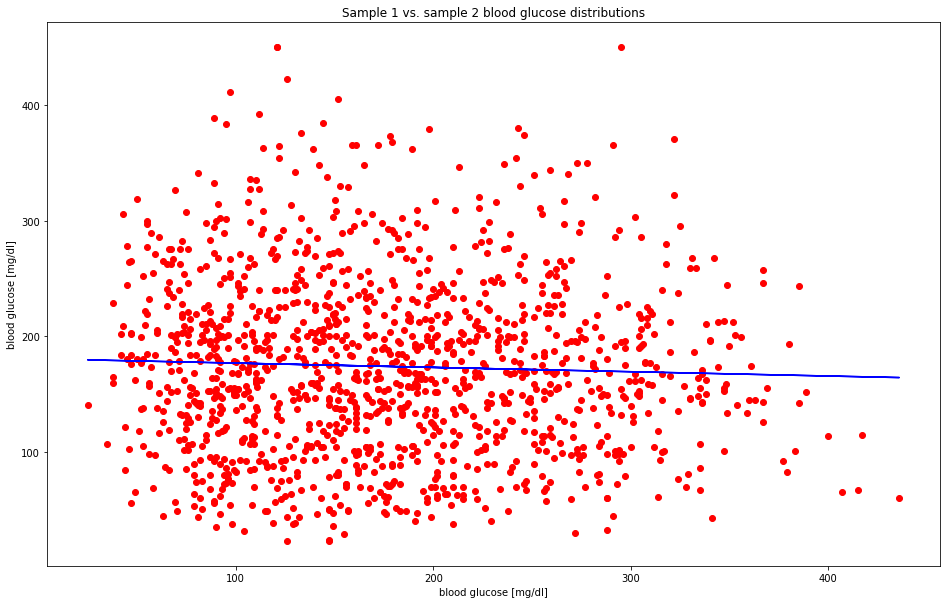

In [22]:
#Plot a scatter plot of the sample 1 versus sample 2 blood glucose distributions and overlay the linear regression on top of it.
plt.figure(figsize=(16,10))     #generate the figure object
plt.title('Sample 1 vs. sample 2 blood glucose distributions')
axes = plt.scatter(DiabetesData_NaN_removed_set_1_PrBBG[0:min_dim],DiabetesData_NaN_removed_set_2_PrBBG[0:min_dim],c='r')
plt.plot(DiabetesData_NaN_removed_set_1_PrBBG[0:min_dim], intercept + slope*DiabetesData_NaN_removed_set_1_PrBBG[0:min_dim], \
         'b', label='Fitted blood glucose line')
plt.xlabel('blood glucose [mg/dl]')
plt.ylabel('blood glucose [mg/dl]')
plt.savefig("Sample_1_vs_Sample_2_PrBBG.png")
plt.show()

In [13]:
#calculate correlation coefficients for the blood glucose distributions corresponding to the samples
corr_coef_samples_1_2 = np.corrcoef(DiabetesData_NaN_removed_set_1_PrBBG[0:min_dim], DiabetesData_NaN_removed_set_2_PrBBG[0:min_dim])
print(corr_coef_samples_1_2)

[[ 1.         -0.03962731]
 [-0.03962731  1.        ]]


In [14]:
#Generate a table using plotly displaying the correltion coefficients for the blood glucose distributions corresponding to the samples
fig = go.Figure(data=go.Table(
    header=dict(values=['sample [#]','1', '1',],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[['1','2'], # 1st column
                       ['{:5.2f}'.format(corr_coef_samples_1_2[0,0]), '{:5.2f}'.format(corr_coef_samples_1_2[0,1])], # 2nd column
                       ['{:5.2f}'.format(corr_coef_samples_1_2[1,0]), '{:5.2f}'.format(corr_coef_samples_1_2[1,1])]], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='center')))
fig.update_layout(width=500, height=300)
fig.write_image("Correlation_coefficients_samples_1_2.png")